# Day High-Low distribution by RSI - Analytics

### Import Library

In [20]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
data['RSI'] = ta.rsi(data["Close"], length=14)
data['RSI'] = round(data['RSI'])

In [11]:
tmp_data = dataset.copy()
tmp_data["DayMaxClose"] = tmp_data["Close"]
tmp_data["DayMinClose"] = tmp_data["Close"]
tmp_data["DayHigh"] = tmp_data["High"]
tmp_data["DayLow"] = tmp_data["Low"]
daily_data = tmp_data.resample('D').agg({
        'DayMaxClose': 'max',
        'DayMinClose': 'min',
        'DayHigh': 'max',
        'DayLow': 'min'
    })
daily_data.dropna(subset=['DayMaxClose'], inplace=True)

In [12]:
data = data.assign(time_d=pd.PeriodIndex(data.index, freq='1D').to_timestamp())

In [14]:
merged_data = pd.merge(data, daily_data, left_on="time_d", right_index=True, how="left")

In [15]:
merged_data

,Open,High,Low,Close,Volume,RSI,time_d,DayMaxClose,DayMinClose,DayHigh,DayLow
Date,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,NaN,2018-08-13,954.2,942.6,954.6,942.3
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,100.0,2018-08-13,954.2,942.6,954.6,942.3
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,93.0,2018-08-13,954.2,942.6,954.6,942.3
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,78.0,2018-08-13,954.2,942.6,954.6,942.3
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,84.0,2018-08-13,954.2,942.6,954.6,942.3
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-25 14:15:00,1358.4,1360.8,1358.2,1360.5,6708,45.0,2025-02-25,1366.9,1358.2,1367.0,1358.0
2025-02-25 14:20:00,1360.3,1362.1,1359.4,1361.0,7025,48.0,2025-02-25,1366.9,1358.2,1367.0,1358.0
2025-02-25 14:25:00,1361.0,1362.2,1360.8,1361.7,4896,51.0,2025-02-25,1366.9,1358.2,1367.0,1358.0


In [17]:
merged_data['is_max_high'] = merged_data.apply(lambda r: True if r["High"] == r["DayHigh"] else False, axis=1)
merged_data['is_max_close'] = merged_data.apply(lambda r: True if r["Close"] == r["DayMaxClose"] else False, axis=1)
merged_data['is_min_low'] = merged_data.apply(lambda r: True if r["Low"] == r["DayLow"] else False, axis=1)
merged_data['is_min_close'] = merged_data.apply(lambda r: True if r["Close"] == r["DayMinClose"] else False, axis=1)

In [18]:
merged_data.dropna(inplace=True)

<Axes: xlabel='RSI'>

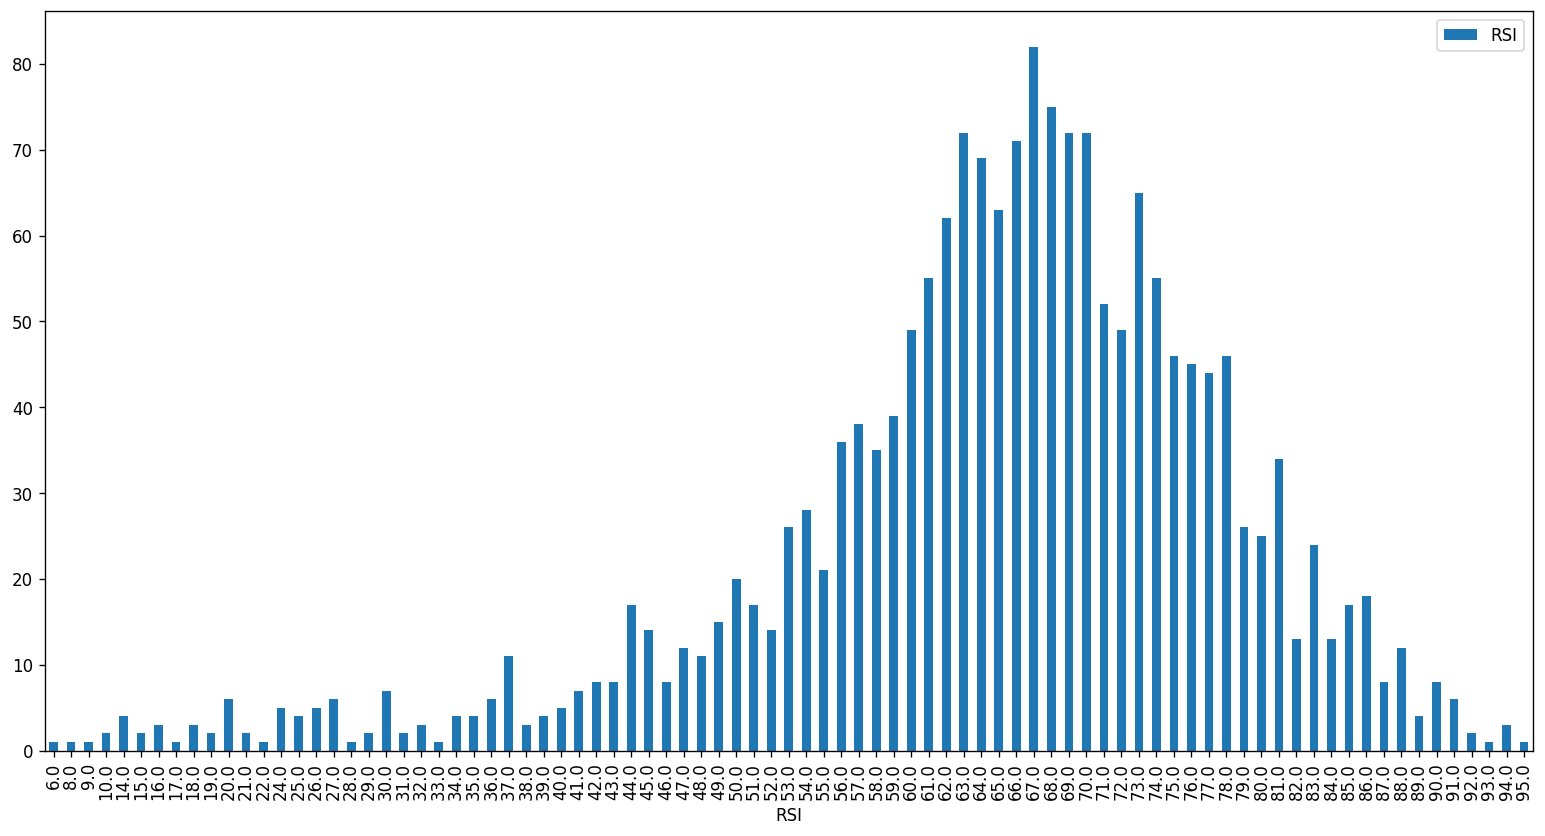

In [21]:
max_high_grouped_by_rsi = merged_data[merged_data.is_max_high == True].groupby(['RSI'])[['RSI']].count()
max_high_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

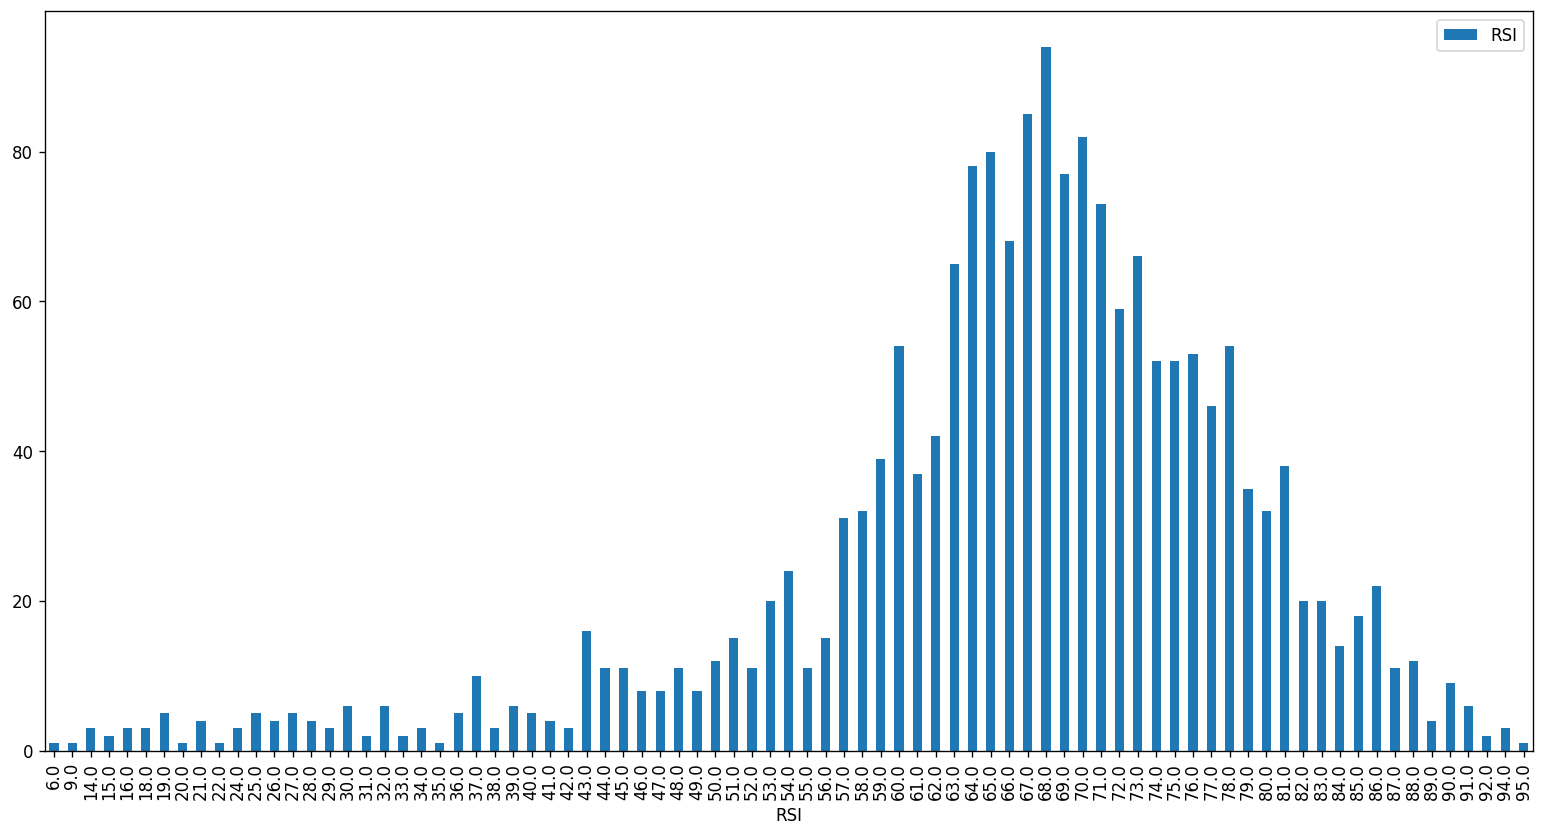

In [23]:
max_close_grouped_by_rsi = merged_data[merged_data.is_max_close == True].groupby(['RSI'])[['RSI']].count()
max_close_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

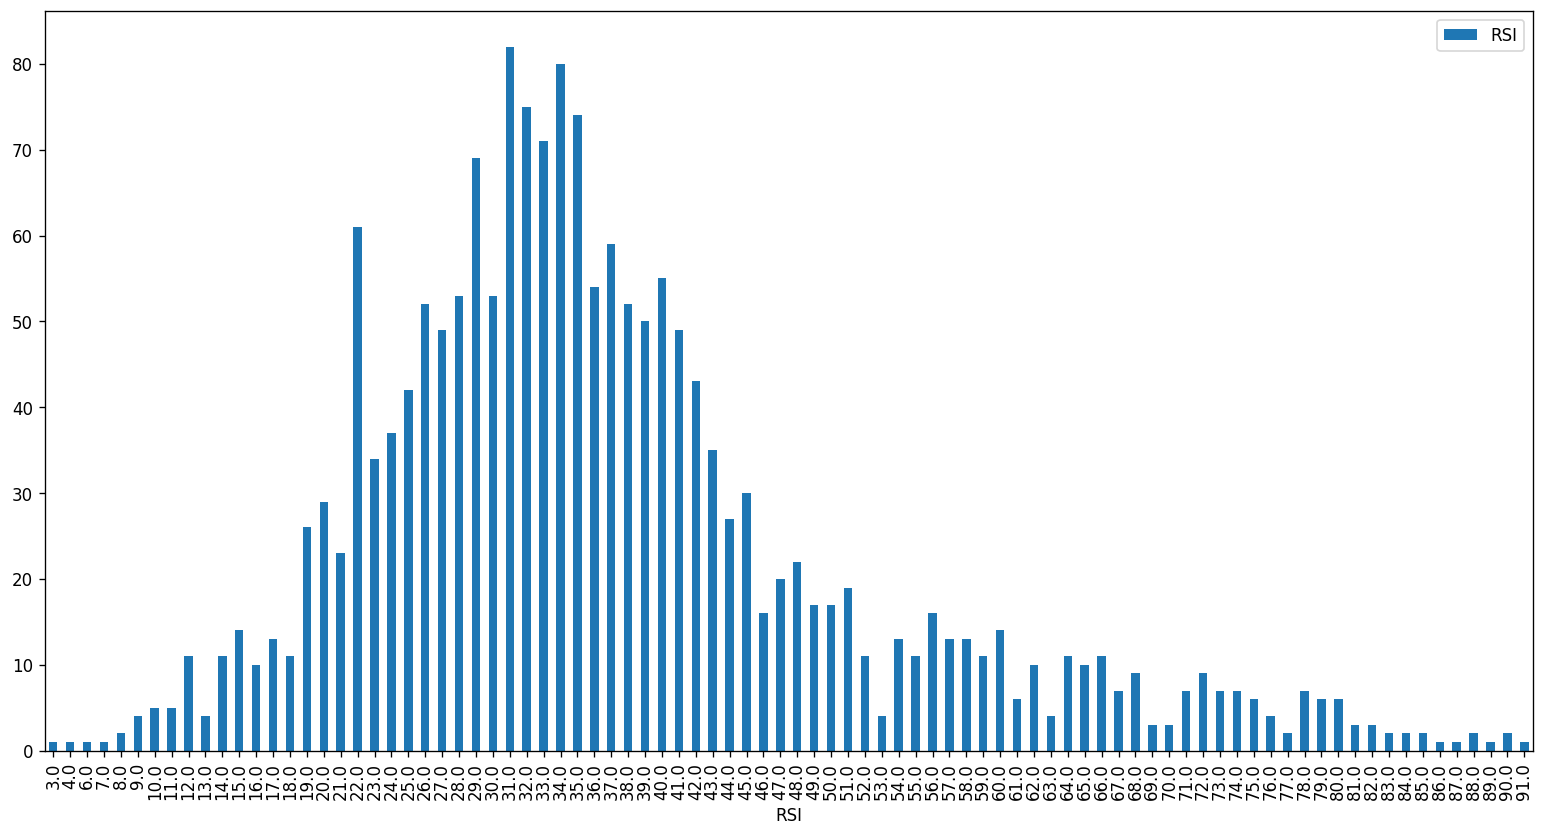

In [22]:
min_low_grouped_by_rsi = merged_data[merged_data.is_min_low == True].groupby(['RSI'])[['RSI']].count()
min_low_grouped_by_rsi.plot.bar()

<Axes: xlabel='RSI'>

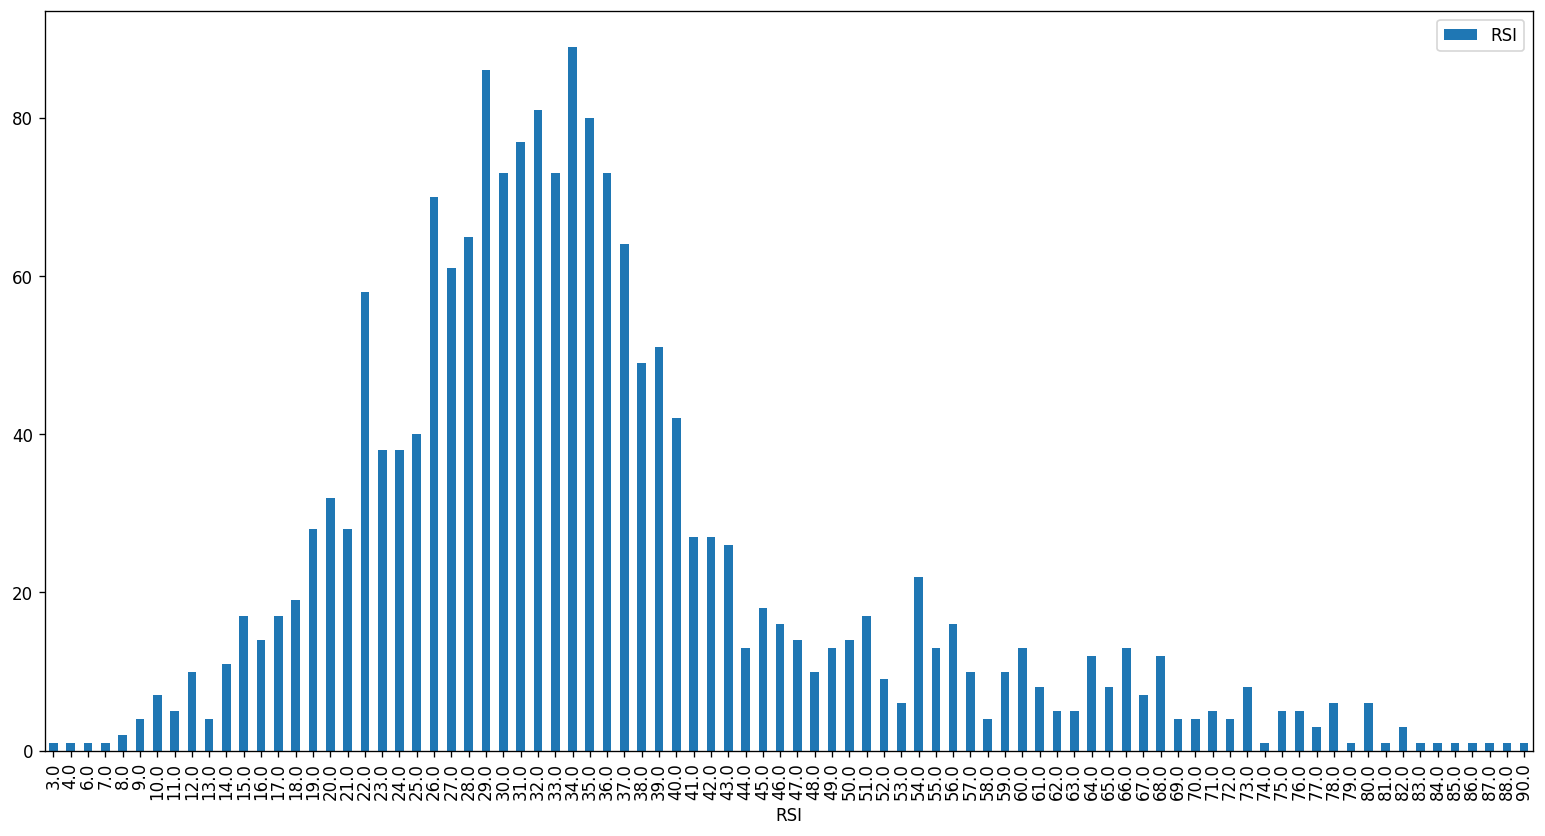

In [24]:
min_close_grouped_by_rsi = merged_data[merged_data.is_min_close == True].groupby(['RSI'])[['RSI']].count()
min_close_grouped_by_rsi.plot.bar()